# Midterm Project
- Anna Ikeda
- Alfonso Garcia
- Erick Espinoza Paz

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc)
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv(r"C:\Users\User\Downloads\bank+marketing\bank-additional\bank-additional\bank-additional.csv", sep=';')

In [20]:
df_info = df.info()
df_shape = df.shape
df_describe = df.describe()
target_labels = df['y'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

# Encode categorical variables and target

In [54]:
df_encoded = pd.get_dummies(df.drop(columns=['y']), drop_first=True)
df_encoded['y'] = df['y'].map({'yes': 1, 'no': 0})

# Split features and target

In [55]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Standard scaling

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 90/10 train-test split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42, stratify=y)

# Initialize models

In [56]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# 10-fold cross-validation on training data

In [57]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=cv, scoring='accuracy')
cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=cv, scoring='accuracy')

# Train models on full training set

In [58]:
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Logistic Regression

In [63]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

# Decision Tree

In [64]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

# Confusion matrices

In [65]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_dt = confusion_matrix(y_test, y_pred_dt)

In [72]:
def evaluate_results(name, y_true, y_pred, y_prob, cm):
    print(f"\n{name} Evaluation")
    print("-" * (len(name) + 11))
    print(f"Accuracy     : {accuracy_score(y_true, y_pred):.2%}")
    print(f"Precision    : {precision_score(y_true, y_pred):.2%}")
    print(f"Recall       : {recall_score(y_true, y_pred):.2%}")
    print(f"F1 Score     : {f1_score(y_true, y_pred):.2%}")
    print(f"AUC Score    : {roc_auc_score(y_true, y_prob):.2%}")
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=["No", "Yes"]))

# Results Logistic Regression

In [73]:
evaluate_results("Logistic Regression", y_test, y_pred_lr, y_prob_lr, cm_lr)


Logistic Regression Evaluation
------------------------------
Accuracy     : 91.02%
Precision    : 66.67%
Recall       : 35.56%
F1 Score     : 46.38%
AUC Score    : 92.27%
Confusion Matrix:
[[359   8]
 [ 29  16]]

Classification Report:
              precision    recall  f1-score   support

          No       0.93      0.98      0.95       367
         Yes       0.67      0.36      0.46        45

    accuracy                           0.91       412
   macro avg       0.80      0.67      0.71       412
weighted avg       0.90      0.91      0.90       412



# Results Decision Tree

In [74]:
evaluate_results("Decision Tree", y_test, y_pred_dt, y_prob_dt, cm_dt)


Decision Tree Evaluation
------------------------
Accuracy     : 90.05%
Precision    : 57.14%
Recall       : 35.56%
F1 Score     : 43.84%
AUC Score    : 87.96%
Confusion Matrix:
[[355  12]
 [ 29  16]]

Classification Report:
              precision    recall  f1-score   support

          No       0.92      0.97      0.95       367
         Yes       0.57      0.36      0.44        45

    accuracy                           0.90       412
   macro avg       0.75      0.66      0.69       412
weighted avg       0.89      0.90      0.89       412



# Logistic Regression ROC Curve

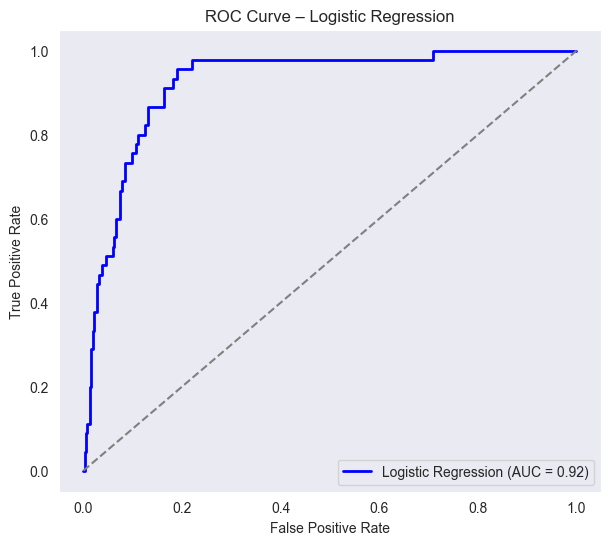

In [75]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)
plt.figure(figsize=(7, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve – Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Decision Tree ROC Curve

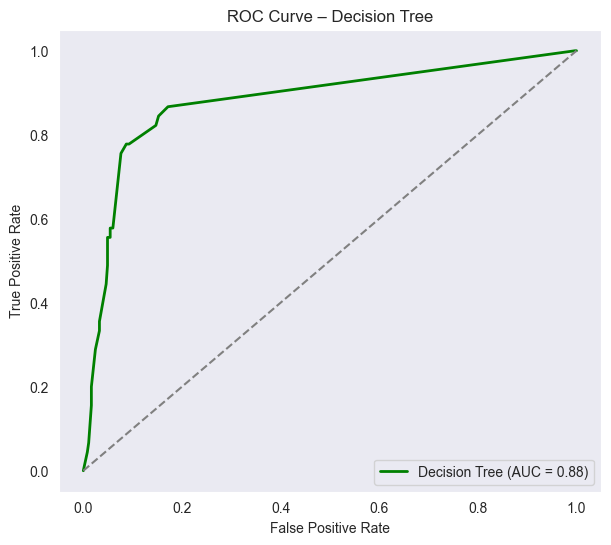

In [76]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)
plt.figure(figsize=(7, 6))
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve – Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()